# Python Documentation
https://docs.python.org/3/

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = '~/DATA/Iris.csv'

# Pandas DataFrames
http://pandas.pydata.org/pandas-docs/stable/reference/frame.html

## Constructors

In [3]:
iris_df = pd.read_csv(data)
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = pd.DataFrame({'names':['Yogesh', 'Jess', 'Jeff', 'Crissy'], 'Glasses':[False, False, True, False]})
df

,names,Glasses
0,Yogesh,False
1,Jess,False
2,Jeff,True
3,Crissy,False


## Indexing
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

### By column name

In [5]:
iris_df.head()['SepalLengthCm']

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: SepalLengthCm, dtype: float64

### By row index

In [6]:
iris_df.loc[2]

Id                         3
SepalLengthCm            4.7
SepalWidthCm             3.2
PetalLengthCm            1.3
PetalWidthCm             0.2
Species          Iris-setosa
Name: 2, dtype: object

### By row index and column name

In [7]:
iris_df.loc[3, 'SepalWidthCm']

3.1

### By integer indexing

In [8]:
iris_df.iloc[3, 2]

3.1

### setting a column as an index

In [9]:
iris_df = iris_df.set_index('Id')
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Wrangling

In [10]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Drop a column

In [11]:
iris_df.drop('PetalLengthCm', axis=1).head()

,SepalLengthCm,SepalWidthCm,PetalWidthCm,Species
Id,,,,
1,5.1,3.5,0.2,Iris-setosa
2,4.9,3.0,0.2,Iris-setosa
3,4.7,3.2,0.2,Iris-setosa
4,4.6,3.1,0.2,Iris-setosa
5,5.0,3.6,0.2,Iris-setosa


In [12]:
iris_df.shape

(150, 5)

### Add a column to the end of the data frame

In [13]:
iris_df['newCol'] = [0]*iris_df.shape[0]
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,newCol
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0
2,4.9,3.0,1.4,0.2,Iris-setosa,0
3,4.7,3.2,1.3,0.2,Iris-setosa,0
4,4.6,3.1,1.5,0.2,Iris-setosa,0
5,5.0,3.6,1.4,0.2,Iris-setosa,0


### Add a column at any position

In [14]:
iris_df.insert(1, 'newCol2', range(iris_df.shape[0]))
iris_df.head()

,SepalLengthCm,newCol2,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,newCol
Id,,,,,,,
1,5.1,0,3.5,1.4,0.2,Iris-setosa,0
2,4.9,1,3.0,1.4,0.2,Iris-setosa,0
3,4.7,2,3.2,1.3,0.2,Iris-setosa,0
4,4.6,3,3.1,1.5,0.2,Iris-setosa,0
5,5.0,4,3.6,1.4,0.2,Iris-setosa,0


### DataFrame.apply
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

In [15]:
help(pd.DataFrame.apply)

Help on function apply in module pandas.core.frame:

apply(self, func, axis=0, broadcast=None, raw=False, reduce=None, result_type=None, args=(), **kwds)
    Apply a function along an axis of the DataFrame.
    
    Objects passed to the function are Series objects whose index is
    either the DataFrame's index (``axis=0``) or the DataFrame's columns
    (``axis=1``). By default (``result_type=None``), the final return type
    is inferred from the return type of the applied function. Otherwise,
    it depends on the `result_type` argument.
    
    Parameters
    ----------
    func : function
        Function to apply to each column or row.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Axis along which the function is applied:
    
        * 0 or 'index': apply function to each column.
        * 1 or 'columns': apply function to each row.
    broadcast : bool, optional
        Only relevant for aggregation functions:
    
        * ``False`` or ``None`` : returns a Se

In [16]:
def PetalWidthCmX2(row):
    row['PetalWidthCm'] *= 2
    return row

In [17]:
iris_df.apply(PetalWidthCmX2, axis=1).head()

,SepalLengthCm,newCol2,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,newCol
Id,,,,,,,
1,5.1,0,3.5,1.4,0.4,Iris-setosa,0
2,4.9,1,3.0,1.4,0.4,Iris-setosa,0
3,4.7,2,3.2,1.3,0.4,Iris-setosa,0
4,4.6,3,3.1,1.5,0.4,Iris-setosa,0
5,5.0,4,3.6,1.4,0.4,Iris-setosa,0


## Plotting
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [18]:
iris_df.dtypes

SepalLengthCm    float64
newCol2            int64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
newCol             int64
dtype: object

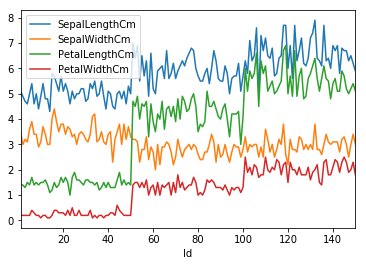

In [19]:
iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']].plot();

### Histogram
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

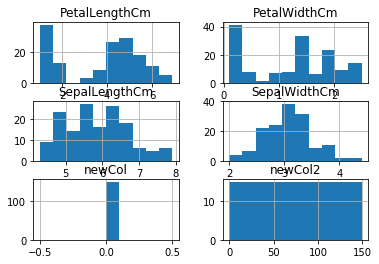

In [20]:
iris_df.hist();

In [21]:
iris_df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

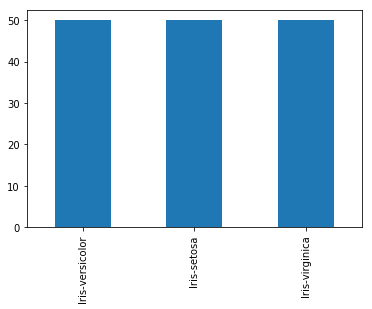

In [22]:
iris_df['Species'].value_counts().plot(kind='bar');

### Scatter Matrix
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-scatter-matrix

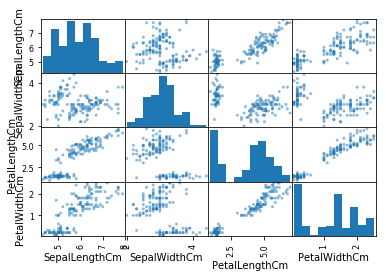

In [23]:
pd.plotting.scatter_matrix(iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']]);

# Matplotlib and Seaborn
https://seaborn.pydata.org/examples/index.html

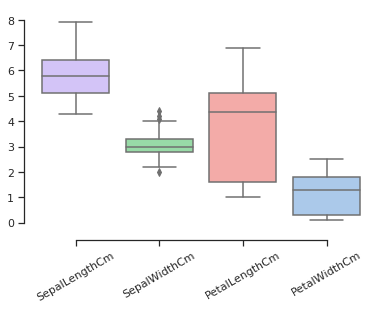

In [24]:
sns.set(style="ticks", palette="pastel")

g = sns.boxplot(palette=["m", "g", 'r', 'b'],
            data=iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']])
sns.despine(offset=10, trim=True)
plt.setp(g.get_xticklabels(), rotation=30);

# Functions and Timing

In [25]:
def loops_a_lot(x, y):
    i = 0
    for _ in range(x):
        for _ in range(y):
            i += 1
    return i

## Jupyter Magic
https://ipython.readthedocs.io/en/stable/interactive/magics.html

In [26]:
loops_a_lot(3, 4)

12

In [27]:
%timeit loops_a_lot(3,4)

3.6 µs ± 379 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [28]:
%%timeit
loops_a_lot(3,4)
loops_a_lot(2,5)

6.45 µs ± 566 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
%timeit loops_a_lot(3,4)
loops_a_lot(2,5)